In [15]:
# 导包
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision.transforms import ToTensor
from sklearn.datasets import fetch_olivetti_faces

In [18]:
# 提取数据集 并且将数据集转换成张量
faces = fetch_olivetti_faces(data_home = './face_data' , shuffle = True,)
# # 百分之三十测试数据集  百分之七十 训练数据集
# train_data, test_data , train_target , test_target = train_test_split(faces.data , faces.target , test_size = 0.3 , random_state = 50)

# 将图片数据集转换成张量
image = torch.FloatTensor(faces.data)
targets = torch.LongTensor(faces.target)

# image.shape
# targets.shape

# 将每个图片对应一个标签
datas = [(img , lbl) for img , lbl in zip(image , targets)]
# datas[1]

In [20]:
# 设置权重参数 (学习率、训练轮数、训练批次)
LR = 0.1
epochs = 50
BATCH_SIZE = 128
# 设置数据集的l批次
train_dl = DataLoader(datas , batch_size = BATCH_SIZE , shuffle = True )

In [51]:
from week04.Model import Model
# 数据模型
model = Model()

In [52]:
def train_iter(epochs , model , train_dl):
    train_hist = []
    # 定义损失函数
    loss_fun = nn.CrossEntropyLoss()
    # 设置优化器
    # optimizer = torch.optim.SGD(model.parameters() , lr = LR)
    optimizer = torch.optim.Adam(model.parameters() , lr = LR)
    for epoch in range(epochs):
        for data , target in train_dl:
            # 前向运算
            output = model(data.reshape(-1 , 4096))
             # 计算损失
            loss = loss_fun(output , target)
             # 反向传播
            optimizer.zero_grad() # 所有参数梯度清零
            loss.backward()  # 计算梯度
            optimizer.step() # 更新参数

        print(f'Epoch:{epoch} Loss:{loss.item()}')
        train_hist.append(loss.item())
    return train_hist

In [ ]:
def draw_train_hist(hist_list):
    plt.plot(hist_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

Epoch:0 Loss:3.5630085468292236
Epoch:1 Loss:3.160952568054199
Epoch:2 Loss:1.444496750831604
Epoch:3 Loss:2.513659954071045
Epoch:4 Loss:1.4385080337524414
Epoch:5 Loss:1.43198561668396
Epoch:6 Loss:0.8346483707427979
Epoch:7 Loss:0.8091707825660706
Epoch:8 Loss:0.48221346735954285
Epoch:9 Loss:4.0016188621521
Epoch:10 Loss:5.186318397521973
Epoch:11 Loss:0.656401515007019
Epoch:12 Loss:4.459031105041504
Epoch:13 Loss:1.5289831161499023
Epoch:14 Loss:0.6602852940559387
Epoch:15 Loss:5.335937023162842
Epoch:16 Loss:1.4490854740142822
Epoch:17 Loss:0.9166532754898071
Epoch:18 Loss:0.6476637125015259
Epoch:19 Loss:1.6124818325042725
Epoch:20 Loss:7.628148555755615
Epoch:21 Loss:3.2585690021514893
Epoch:22 Loss:1.4425163269042969
Epoch:23 Loss:1.0725884437561035
Epoch:24 Loss:4.3951616287231445
Epoch:25 Loss:2.1651976108551025
Epoch:26 Loss:1.609294056892395
Epoch:27 Loss:0.5476983785629272
Epoch:28 Loss:1.0387780666351318
Epoch:29 Loss:1.1334550380706787
Epoch:30 Loss:0.9635647535324097


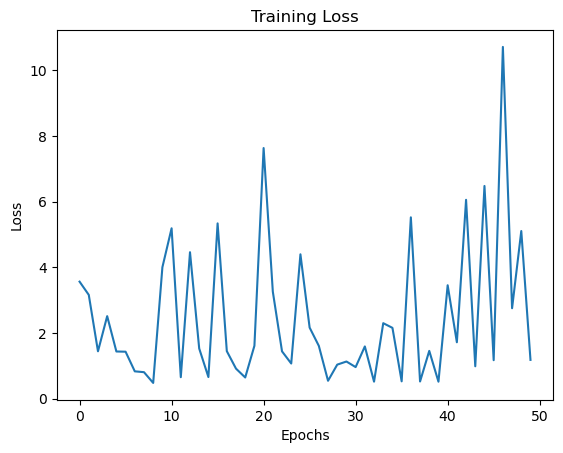

In [59]:
# 用SGD 优化器
model_hist = train_iter(epochs, model, train_dl)
draw = draw_train_hist(model_hist)

Epoch:0 Loss:1.2484447956085205
Epoch:1 Loss:1.6971499919891357
Epoch:2 Loss:0.9272677302360535
Epoch:3 Loss:2.9225618839263916
Epoch:4 Loss:0.9975768327713013
Epoch:5 Loss:1.3766734600067139
Epoch:6 Loss:3.0712168216705322
Epoch:7 Loss:0.6755666732788086
Epoch:8 Loss:0.6268270015716553
Epoch:9 Loss:1.3893303871154785
Epoch:10 Loss:4.02121639251709
Epoch:11 Loss:2.074022054672241
Epoch:12 Loss:2.941593647003174
Epoch:13 Loss:6.057777404785156
Epoch:14 Loss:2.230628728866577
Epoch:15 Loss:1.0155055522918701
Epoch:16 Loss:2.8085458278656006
Epoch:17 Loss:0.39885520935058594
Epoch:18 Loss:0.5651456713676453
Epoch:19 Loss:0.9466570615768433
Epoch:20 Loss:3.3485605716705322
Epoch:21 Loss:1.0999374389648438
Epoch:22 Loss:0.34537047147750854
Epoch:23 Loss:3.767292022705078
Epoch:24 Loss:2.807750701904297
Epoch:25 Loss:2.3120930194854736
Epoch:26 Loss:0.8499988913536072
Epoch:27 Loss:3.4734046459198
Epoch:28 Loss:1.882344365119934
Epoch:29 Loss:3.9649102687835693
Epoch:30 Loss:1.44578504562377

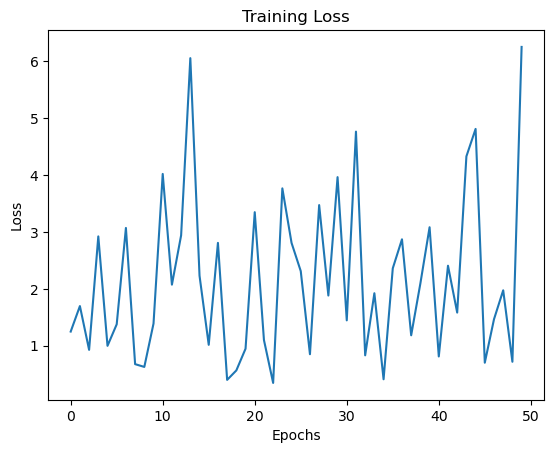

In [58]:
# RAdam优化器
model_hist = train_iter(epochs, model, train_dl)
draw = draw_train_hist(model_hist)